# import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample Dataset

In [9]:
# Create dataset
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (800, 2)
Testing Shape: (200, 2)


# Logistic Regression from Scratch

In [4]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Class
class LogisticRegressionScratch:

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Model Training

In [10]:
model_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model_scratch.fit(X_train, y_train)

# Prediction
y_pred_scratch = model_scratch.predict(X_test)

# Accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy From Scratch:", accuracy_scratch)

Accuracy From Scratch: 0.9


# Logistic Regression from Scikit-Learn

In [11]:
from sklearn.linear_model import LogisticRegression

model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)

# Prediction
y_pred_sklearn = model_sklearn.predict(X_test)

# Accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (Scikit-Learn):", accuracy_sklearn)

Accuracy (Scikit-Learn): 0.9


# Comparison

In [12]:
print("Confusion Matrix - Scratch:")
print(confusion_matrix(y_test, y_pred_scratch))

print("\nConfusion Matrix - Scikit-Learn:")
print(confusion_matrix(y_test, y_pred_sklearn))

Confusion Matrix - Scratch:
[[97  7]
 [13 83]]

Confusion Matrix - Scikit-Learn:
[[97  7]
 [13 83]]


# Visualization

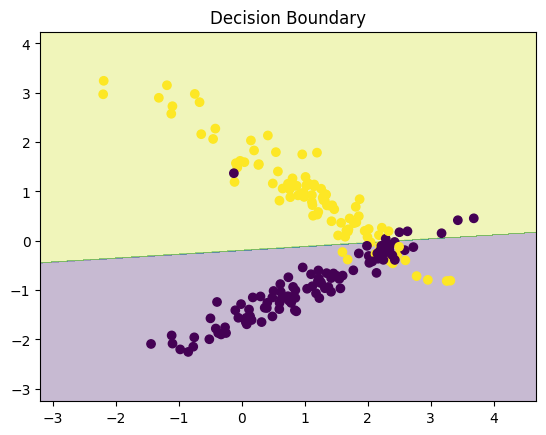

In [13]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model_scratch)